This project introduces DNN-s and CNN-s by using tensorflow and keras on the CIFAR10 dataset.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import himage as hi

2024-01-31 09:09:19.669548: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-31 09:09:19.748177: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-31 09:09:19.748210: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-31 09:09:19.749773: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-31 09:09:19.763530: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-31 09:09:19.764512: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
[6]


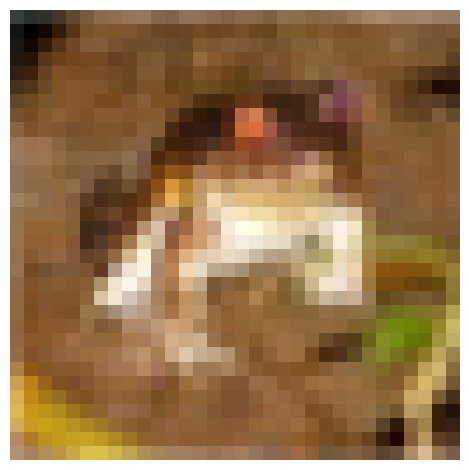

In [3]:
# lets look at the data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# lets look at the first image
print(y_train[0])
hi.imshow(x_train[0])


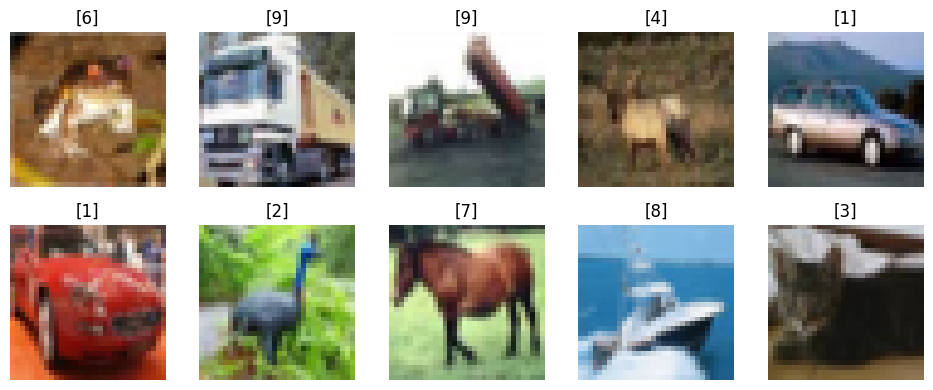

In [4]:
hi.multimshow(x_train[:10], titles=y_train[:10], n_cols=5)

Lets see some more info about the data

In [5]:
# the type of the data
print(x_train.dtype)
print(y_train.dtype)

# the number of classes 
labels = np.unique(y_train)
print(labels)
print(labels.shape)

# the number of images in each class
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))

uint8
uint8
[0 1 2 3 4 5 6 7 8 9]
(10,)
{0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 5000}


Lets normalize the data to be between 0 and 1

In [6]:
x_train_f = x_train.astype('float') / 255.
x_test_f = x_test.astype('float') / 255.

print(x_train[0].max())
print(x_train_f[0].max())

255
1.0


Than we convert the labels to one-hot encoding

In [7]:
y_train_oh = tf.keras.utils.to_categorical(y_train, num_classes=labels.size)
y_test_oh = tf.keras.utils.to_categorical(y_test, num_classes=labels.size)

print(y_train[0])
print(y_train_oh[0])

[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


Lets use Keras to build a dense network with 3 hidden layers, using Sequential and Dense

In [22]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3))) # input layer that also flattens the input
model.add(tf.keras.layers.Dense(128, activation='relu')) 
model.add(tf.keras.layers.Dense(128, activation='relu')) 
model.add(tf.keras.layers.Dense(128, activation='relu')) 
model.add(tf.keras.layers.Dense(labels.size, activation='softmax')) # output layer

We train the model using the fit method

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_f, y_train_oh, epochs=10, batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8733 - accuracy: 0.3178
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7007 - accuracy: 0.3867
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6330 - accuracy: 0.4143
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5751 - accuracy: 0.4356
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5367 - accuracy: 0.4482
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5027 - accuracy: 0.4611
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4767 - accuracy: 0.4706
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4518 - accuracy: 0.4784
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4350 - accuracy: 0.4848
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.414

The loss and the accuracy hadn't stabilized yet, lets train the model for 10 more epochs

In [10]:
model.fit(x_train_f, y_train_oh, epochs=10, batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4022 - accuracy: 0.4953
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3868 - accuracy: 0.5025
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3697 - accuracy: 0.5079
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3587 - accuracy: 0.5115
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3442 - accuracy: 0.5141
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3307 - accuracy: 0.5218
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3246 - accuracy: 0.5239
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3142 - accuracy: 0.5294
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3015 - accuracy: 0.5325
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.293

The metrics are still not stabilized, lets use callbacks to stop the training when the accuracy stops improving we use the EarlyStopping callback

In [11]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
model.fit(x_train_f, y_train_oh, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2770 - accuracy: 0.5404 - val_loss: 1.2800 - val_accuracy: 0.5446
Epoch 2/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2689 - accuracy: 0.5445 - val_loss: 1.3293 - val_accuracy: 0.5167
Epoch 3/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2571 - accuracy: 0.5462 - val_loss: 1.3168 - val_accuracy: 0.5254
Epoch 4/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2432 - accuracy: 0.5509 - val_loss: 1.3109 - val_accuracy: 0.5312


Lets evaluate the model on the test set

In [12]:
model.evaluate(x_test_f, y_test_oh)

313/313 [==============================] - 1s 2ms/step - loss: 1.4603 - accuracy: 0.4886


[1.4603263139724731, 0.4885999858379364]

Lets try another architecture with variable size of the hidden layers

In [13]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3))) 
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(labels.size, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_f, y_train_oh, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

model.evaluate(x_test_f, y_test_oh)


Epoch 1/100
1250/1250 [==============================] - 23s 18ms/step - loss: 1.9092 - accuracy: 0.3005 - val_loss: 1.7926 - val_accuracy: 0.3440
Epoch 2/100
1250/1250 [==============================] - 22s 18ms/step - loss: 1.7324 - accuracy: 0.3731 - val_loss: 1.7284 - val_accuracy: 0.3684
Epoch 3/100
1250/1250 [==============================] - 22s 18ms/step - loss: 1.6421 - accuracy: 0.4083 - val_loss: 1.6356 - val_accuracy: 0.4100
Epoch 4/100
1250/1250 [==============================] - 22s 18ms/step - loss: 1.5836 - accuracy: 0.4296 - val_loss: 1.6331 - val_accuracy: 0.4130
Epoch 5/100
1250/1250 [==============================] - 22s 17ms/step - loss: 1.5429 - accuracy: 0.4452 - val_loss: 1.5434 - val_accuracy: 0.4477
Epoch 6/100
1250/1250 [==============================] - 21s 17ms/step - loss: 1.5089 - accuracy: 0.4545 - val_loss: 1.5318 - val_accuracy: 0.4504
Epoch 7/100
1250/1250 [==============================] - 21s 17ms/step - loss: 1.4785 - accuracy: 0.4689 - val_loss: 1

[1.4817509651184082, 0.47540000081062317]

Ultimately, DNN models aren't optimal for recognizing visual information. 

lets try another model this time with convolutional layers

In [14]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) # convolutional layer
model.add(tf.keras.layers.MaxPooling2D((2, 2))) # pooling layer
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu')) # convolutional layer
model.add(tf.keras.layers.MaxPooling2D((2, 2))) # pooling layer
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu')) # convolutional layer
model.add(tf.keras.layers.Flatten()) # flattening layer
model.add(tf.keras.layers.Dense(64, activation='relu')) # dense layer
model.add(tf.keras.layers.Dense(labels.size, activation='softmax')) # output layer


lets compile and train the model

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_f, y_train_oh, epochs=20, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/20
1407/1407 [==============================] - 19s 13ms/step - loss: 1.5445 - accuracy: 0.4355 - val_loss: 1.2897 - val_accuracy: 0.5384
Epoch 2/20
1407/1407 [==============================] - 18s 13ms/step - loss: 1.1976 - accuracy: 0.5719 - val_loss: 1.1139 - val_accuracy: 0.6086
Epoch 3/20
1407/1407 [==============================] - 18s 13ms/step - loss: 1.0379 - accuracy: 0.6362 - val_loss: 0.9927 - val_accuracy: 0.6500
Epoch 4/20
1407/1407 [==============================] - 18s 13ms/step - loss: 0.9323 - accuracy: 0.6734 - val_loss: 0.9427 - val_accuracy: 0.6726
Epoch 5/20
1407/1407 [==============================] - 18s 13ms/step - loss: 0.8649 - accuracy: 0.6946 - val_loss: 0.9318 - val_accuracy: 0.6820
Epoch 6/20
1407/1407 [==============================] - 18s 13ms/step - loss: 0.8027 - accuracy: 0.7191 - val_loss: 0.8570 - val_accuracy: 0.7094
Epoch 7/20
1407/1407 [==============================] - 18s 13ms/step - loss: 0.7551 - accuracy: 0.7346 - val_loss: 0.8547 -

lets evaluate the model on the test set

In [16]:
model.evaluate(x_test_f, y_test_oh)

313/313 [==============================] - 1s 4ms/step - loss: 0.8542 - accuracy: 0.7154


[0.8541830778121948, 0.715399980545044]

We see a substential improvement

Lets use data augmentation 

In [17]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

datagen.fit(x_train_f)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) 
model.add(tf.keras.layers.MaxPooling2D((2, 2))) 
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu')) 
model.add(tf.keras.layers.Dense(labels.size, activation='softmax')) 

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(datagen.flow(x_train_f, y_train_oh, batch_size=32), epochs=100, validation_data=(x_test_f, y_test_oh), callbacks=[early_stopping])

model.evaluate(x_test_f, y_test_oh)


Epoch 1/100
1563/1563 [==============================] - 37s 23ms/step - loss: 1.6551 - accuracy: 0.3900 - val_loss: 1.4024 - val_accuracy: 0.4934
Epoch 2/100
1563/1563 [==============================] - 37s 24ms/step - loss: 1.3371 - accuracy: 0.5163 - val_loss: 1.1828 - val_accuracy: 0.5855
Epoch 3/100
1563/1563 [==============================] - 36s 23ms/step - loss: 1.2189 - accuracy: 0.5634 - val_loss: 1.1511 - val_accuracy: 0.5968
Epoch 4/100
1563/1563 [==============================] - 36s 23ms/step - loss: 1.1452 - accuracy: 0.5905 - val_loss: 1.0429 - val_accuracy: 0.6291
Epoch 5/100
1563/1563 [==============================] - 37s 24ms/step - loss: 1.0972 - accuracy: 0.6113 - val_loss: 1.0065 - val_accuracy: 0.6496
Epoch 6/100
1563/1563 [==============================] - 37s 24ms/step - loss: 1.0471 - accuracy: 0.6287 - val_loss: 0.9897 - val_accuracy: 0.6563
Epoch 7/100
1563/1563 [==============================] - 36s 23ms/step - loss: 1.0160 - accuracy: 0.6395 - val_loss: 0

[0.774512529373169, 0.7332000136375427]

The early stopping wasn't triggered, but we'll move one

In [23]:
# lets try to add dropout to the model

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.2)) # dropout layer
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(labels.size, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(datagen.flow(x_train_f, y_train_oh, batch_size=32), epochs=100, validation_data=(x_test_f, y_test_oh), callbacks=[early_stopping])

Epoch 1/100
1563/1563 [==============================] - 36s 22ms/step - loss: 1.6770 - accuracy: 0.3854 - val_loss: 1.3738 - val_accuracy: 0.5051
Epoch 2/100
1563/1563 [==============================] - 32s 21ms/step - loss: 1.3867 - accuracy: 0.5001 - val_loss: 1.2444 - val_accuracy: 0.5523
Epoch 3/100
1563/1563 [==============================] - 33s 21ms/step - loss: 1.2609 - accuracy: 0.5504 - val_loss: 1.2229 - val_accuracy: 0.5675
Epoch 4/100
1563/1563 [==============================] - 34s 22ms/step - loss: 1.1951 - accuracy: 0.5736 - val_loss: 1.0641 - val_accuracy: 0.6242
Epoch 5/100
1563/1563 [==============================] - 39s 25ms/step - loss: 1.1409 - accuracy: 0.5944 - val_loss: 1.1523 - val_accuracy: 0.5955
Epoch 6/100
1563/1563 [==============================] - 37s 23ms/step - loss: 1.1081 - accuracy: 0.6060 - val_loss: 1.0006 - val_accuracy: 0.6455
Epoch 7/100
1563/1563 [==============================] - 35s 22ms/step - loss: 1.0760 - accuracy: 0.6194 - val_loss: 0

In [19]:
model.evaluate(x_test_f, y_test_oh)

313/313 [==============================] - 1s 4ms/step - loss: 0.7898 - accuracy: 0.7241


[0.7898476719856262, 0.7240999937057495]

Lets add batch normalization

In [24]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.BatchNormalization()) # batch normalization layer
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization()) # batch normalization layer
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(labels.size, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(datagen.flow(x_train_f, y_train_oh, batch_size=32), epochs=100, validation_data=(x_test_f, y_test_oh), callbacks=[early_stopping])

Epoch 1/100
1563/1563 [==============================] - 47s 30ms/step - loss: 1.5394 - accuracy: 0.4454 - val_loss: 1.2750 - val_accuracy: 0.5477
Epoch 2/100
1563/1563 [==============================] - 46s 29ms/step - loss: 1.2687 - accuracy: 0.5482 - val_loss: 1.1295 - val_accuracy: 0.5999
Epoch 3/100
1563/1563 [==============================] - 46s 30ms/step - loss: 1.1558 - accuracy: 0.5934 - val_loss: 1.1785 - val_accuracy: 0.5861
Epoch 4/100
1563/1563 [==============================] - 46s 29ms/step - loss: 1.0782 - accuracy: 0.6188 - val_loss: 1.6258 - val_accuracy: 0.5191
Epoch 5/100
1563/1563 [==============================] - 46s 29ms/step - loss: 1.0209 - accuracy: 0.6400 - val_loss: 0.9662 - val_accuracy: 0.6655
Epoch 6/100
1563/1563 [==============================] - 46s 29ms/step - loss: 0.9746 - accuracy: 0.6569 - val_loss: 1.0155 - val_accuracy: 0.6653
Epoch 7/100
1563/1563 [==============================] - 46s 29ms/step - loss: 0.9477 - accuracy: 0.6668 - val_loss: 0

In [26]:
model.evaluate(x_test_f, y_test_oh)

313/313 [==============================] - 2s 5ms/step - loss: 0.7561 - accuracy: 0.7455


[0.7560604810714722, 0.7455000281333923]